# Deep Learning Technique (RNN-LSTM)

##### Google Stock price prediction using this technique. 

**What is RNN?**
- Recurrent Neural Networks can memorize/ remember previous inputs in memory when there is huge sequential data given to it.<b>
    
    
- It's like a feed forward neural network that has an internal memory.<b>
    
    
- After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the   current input and the output that it has learned from the previous input. <b>
    
    
- In RNN all the inputs are related to each other, whereas in other neural networks, all the inputs are independent of each other.

**What is LSTM?**
    
- Long Short Term Memory networks are a special kind of RNN which are capable of learning long-term dependencies.<b>
    
    
     
- It consists of one memory cell and three gates/regulators: input gate, an output gate and a forget gate. <b>
    
    
    - Input gate:  To control the new values flowing into the cell.
    - Forget gate: To control the extent to which a value remains in the cell.
    - Output gate: To control the extent to which the value in the cell is used to compute output activation of LSTM unit.
    
    

*In short: LSTMs are designed to avoid the long-term dependency problem.*
    
#### For more detailed information on RNN-LSTM, click [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/ "Please click here") 

The data used in this notebook is from 19th August,2004 to 7th October,2019.
#### Dataset can downloaded from [here](https://finance.yahoo.com/quote/GOOG/history/?guccounter=1 "Please click here").
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
#  Load the dataset
data = pd.read_csv(r'C:\Users\Win8\Desktop\practice scripts\RNN LSTM\Stock prediction\Stock price prediction\GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [3]:
# Define training data
data_training_1 = data[data['Date']<'2019-01-01']
data_training = data_training_1.drop(['Date', 'Adj Close'], axis = 1)

# Define testing data
data_test = data[data['Date']>='2019-01-01']

**The values in the training data are not in a particular range, so to convert all the values between 0 to 1, MinMaxScaler() function is used**

In [4]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
print(data_training)


[[3.30294890e-04 9.44785459e-04 0.00000000e+00 1.34908021e-04
  5.43577404e-01]
 [7.42148227e-04 2.98909923e-03 1.88269054e-03 3.39307537e-03
  2.77885613e-01]
 [4.71386886e-03 4.78092896e-03 5.42828241e-03 3.83867225e-03
  2.22150736e-01]
 ...
 [7.92197108e-01 8.11970141e-01 7.90196475e-01 8.15799920e-01
  2.54672037e-02]
 [8.18777193e-01 8.21510648e-01 8.20249255e-01 8.10219301e-01
  1.70463908e-02]
 [8.19874096e-01 8.19172449e-01 8.12332341e-01 8.09012935e-01
  1.79975186e-02]]


**We will read the data for first 60 days and then predict for the 61th day. The we will move ahead by one day and read the next chunk of data for next 60 days and so on.**

**We will train the model on 60 days data at a time. So the 'for' loop mentioned below divides the data into chunks of 60 rows.
After that, converting  X_train  and  y_train  into  numpy arrays.**

In [5]:
X_train = []
y_train = []
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train.shape

(3557, 60, 5)

**So, X_train consists of 3557 number of data. Each data has 60 lists and each list
has 5 elements (Open, High, Low, Close and Volume)**

In [7]:
# importing Keras for building Deep learning model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

- **We are selecting 60 units as the LSTM layer** <b>
    
    
- **Selecting Relu activation function. It is a linear function that will output the input directly if it is positive,
otherwise, it will give zero.** <b>
    
    
- **Return sequence is set to true to return the full sequence as the output.** <b>
    
    
- **First layer input shape is (60,5)** <b>
    
    
- **At each update of the training phase, dropout_layer is used to randomly set the outgoing values to 0.
Values of dropout specifies the probability at which outputs of the layer are dropped out.** <b>
    
    
- **Lastly a dense layer is used, which is a regular deeply connected neural network layer.
As mentined before, we are predicting one value using 60 input layer, so the last layer is set to 1.**


In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))
                                                                                            
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))
                                                                                            
regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))
                                                                                            
regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))
                                                                                            
regressor.add(Dense(units = 1))

In [9]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

**Now we are compiling and fitting our model to the training data. We are selecting 50 iterations and 
batch size as 32, means the weights will be updateed after 32 training examples.**

In [10]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
112/112 [==============================] - 44s 338ms/step - loss: 0.0305
Epoch 2/50
112/112 [==============================] - 51s 457ms/step - loss: 0.0018
Epoch 3/50
112/112 [==============================] - 49s 435ms/step - loss: 0.0019
Epoch 4/50
112/112 [==============================] - 46s 415ms/step - loss: 0.0018
Epoch 5/50
112/112 [==============================] - 45s 404ms/step - loss: 0.0015
Epoch 6/50
112/112 [==============================] - 46s 412ms/step - loss: 0.0016
Epoch 7/50
112/112 [==============================] - 51s 452ms/step - loss: 0.0014
Epoch 8/50
112/112 [==============================] - 48s 432ms/step - loss: 0.0011
Epoch 9/50
112/112 [==============================] - 43s 379ms/step - loss: 0.0012
Epoch 10/50
112/112 [==============================] - 49s 435ms/step - loss: 0.0016
Epoch 11/50
112/112 [==============================] - 50s 447ms/step - loss: 0.0012
Epoch 12/50
112/112 [==============================] - 46s 415ms/step - lo

In [11]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


**For the test data, to predict the opening on any day we need to have data of previous 60 days, so we will select the last 60 days of training data and append it to the testing data.**

In [12]:
# Select past 60 days training data
past_60_days = data_training_1.tail(60)
# past_60_days

In [13]:
df = past_60_days.append(data_test, ignore_index = True)

# To get the date range for plotting it in X-axis
df1 = df[["Date"]]

# Dropping extra columns which are not required
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


**Similar to training data, we need to have our testing data in a particular range by converting it between 0 to 1.**

In [14]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01398824]])

**Prepare out test data similar to training data**

In [15]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

**Next step will help us to predict the opening of X_text**

In [16]:
y_pred = regressor.predict(X_test)

**To bring back the scaled values to the original scale, we need to identify the scaling level using scaler.scale_**

In [17]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

**We will multiply  y_pred  and  y_test  with the inverse of this scaling level value to get all the values in the original scale.**

In [18]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [19]:
y_pred = y_pred*scale
y_test = y_test*scale

In [20]:
len(y_pred)

192

# Visualization

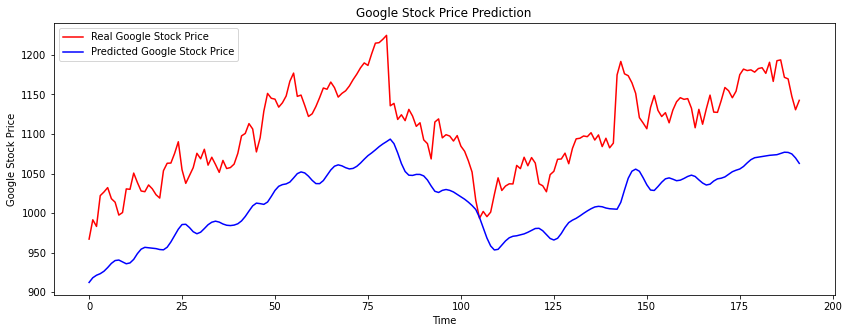

In [21]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**Graph shows good prediction of Google stock price with a good accuracy** <b>
    
    
**Now, to carry out statistical analysis between y_test and y_pred, below mentioned package is used**

In [22]:
import HydroErr as he

# to convert dataframe into 1D array
y_test = y_test.flatten()

y_pred = y_pred.flatten()



**To find R_squared value**

In [23]:
# Compute the the Coefficient of Determination (r2) (without intercept)
pred = np.array(y_pred)
test = np.array(y_test)
r2 = np.round(he.r_squared(pred, test), 3)
print('Coefficient of Determination (r2):', r2)

Coefficient of Determination (r2): 0.806


**To further improve the prediction accuracy and R_squared value, different epoch values can be tried out and dropout values can also be changed.**


### Hope, this script of Deep Learning technique be useful and one can even apply this script for different applications.

# Thank you